In [5]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import json


mpl.rcParams["font.family"] = "serif"
mpl.rcParams["font.serif"] = ["Computer Modern"]
mpl.rcParams["text.usetex"] = True

In [6]:
df_dict = {}
for proj in ["JPetStore", "DayTrader", "AcmeAir", "Plants"]:
	with open(f"../results/Mono2Multi_FullResults/Mono2Multi_{proj}.json") as f:
		data = json.load(f)
	df = pd.DataFrame(data).drop(["microservices", "n_clusters"], axis=1)
	df = df.groupby(["alpha", "threshold"], as_index=False).mean()
	df = df[(df["alpha"] != 0) & (df["threshold"] != 0) & (df["alpha"] != 1) & (df["threshold"] != 1)]
	df["overall"] = 0.75 + 0.25 * df["SM"] - 0.25 * df["ICP"] - 0.25 * df["NED"] - 0.25 * df["IFN"]
	df_dict[proj] = df

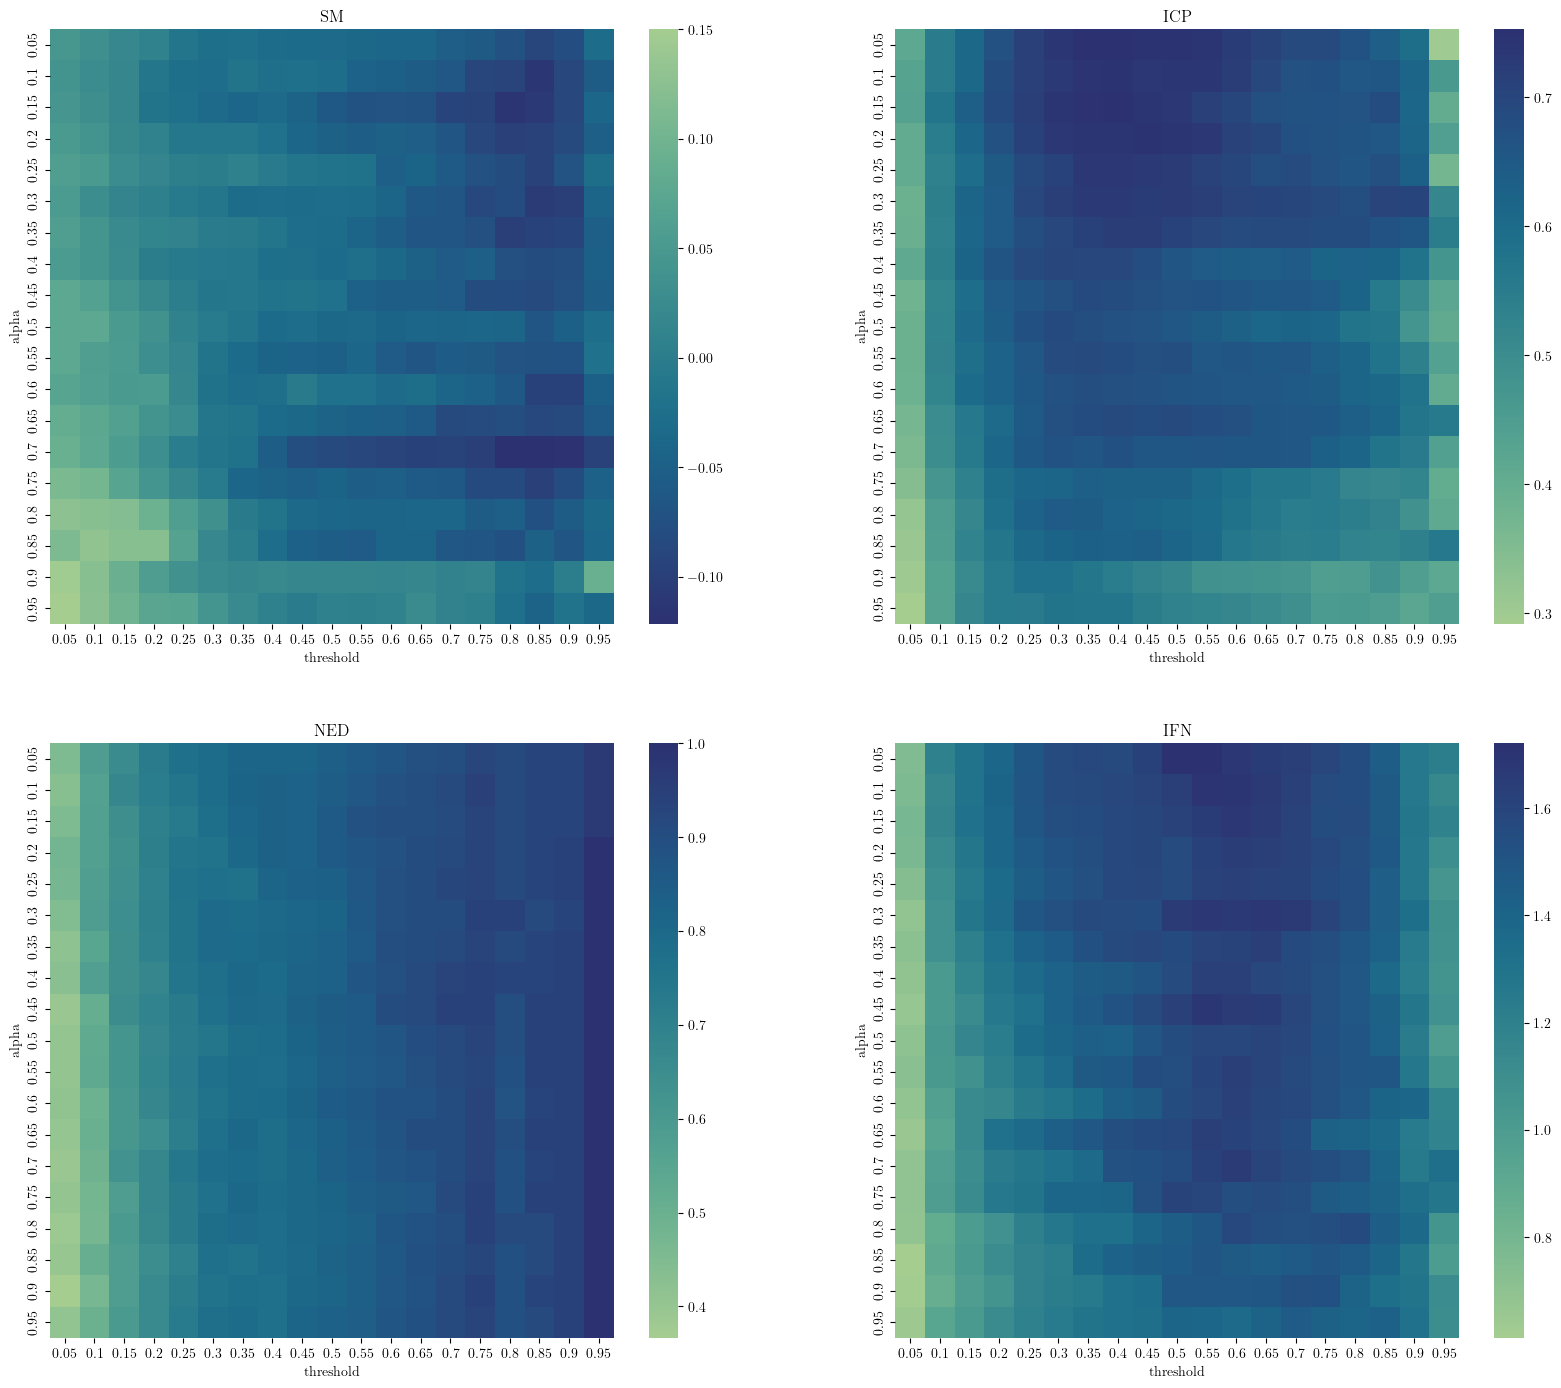

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(20, 17))
sns.heatmap(df_dict["JPetStore"].pivot(index="alpha", columns="threshold", values="SM"), cmap="crest_r", ax=axes[0, 0])
axes[0, 0].set_title("SM")
sns.heatmap(df_dict["JPetStore"].pivot(index="alpha", columns="threshold", values="ICP"), cmap="crest", ax=axes[0, 1])
axes[0, 1].set_title("ICP")
sns.heatmap(df_dict["JPetStore"].pivot(index="alpha", columns="threshold", values="NED"), cmap="crest", ax=axes[1, 0])
axes[1, 0].set_title("NED")
sns.heatmap(df_dict["JPetStore"].pivot(index="alpha", columns="threshold", values="IFN"), cmap="crest", ax=axes[1, 1])
axes[1, 1].set_title("IFN")
plt.show()
fig.savefig("JPetStoreHeatmaps.pdf", bbox_inches="tight")

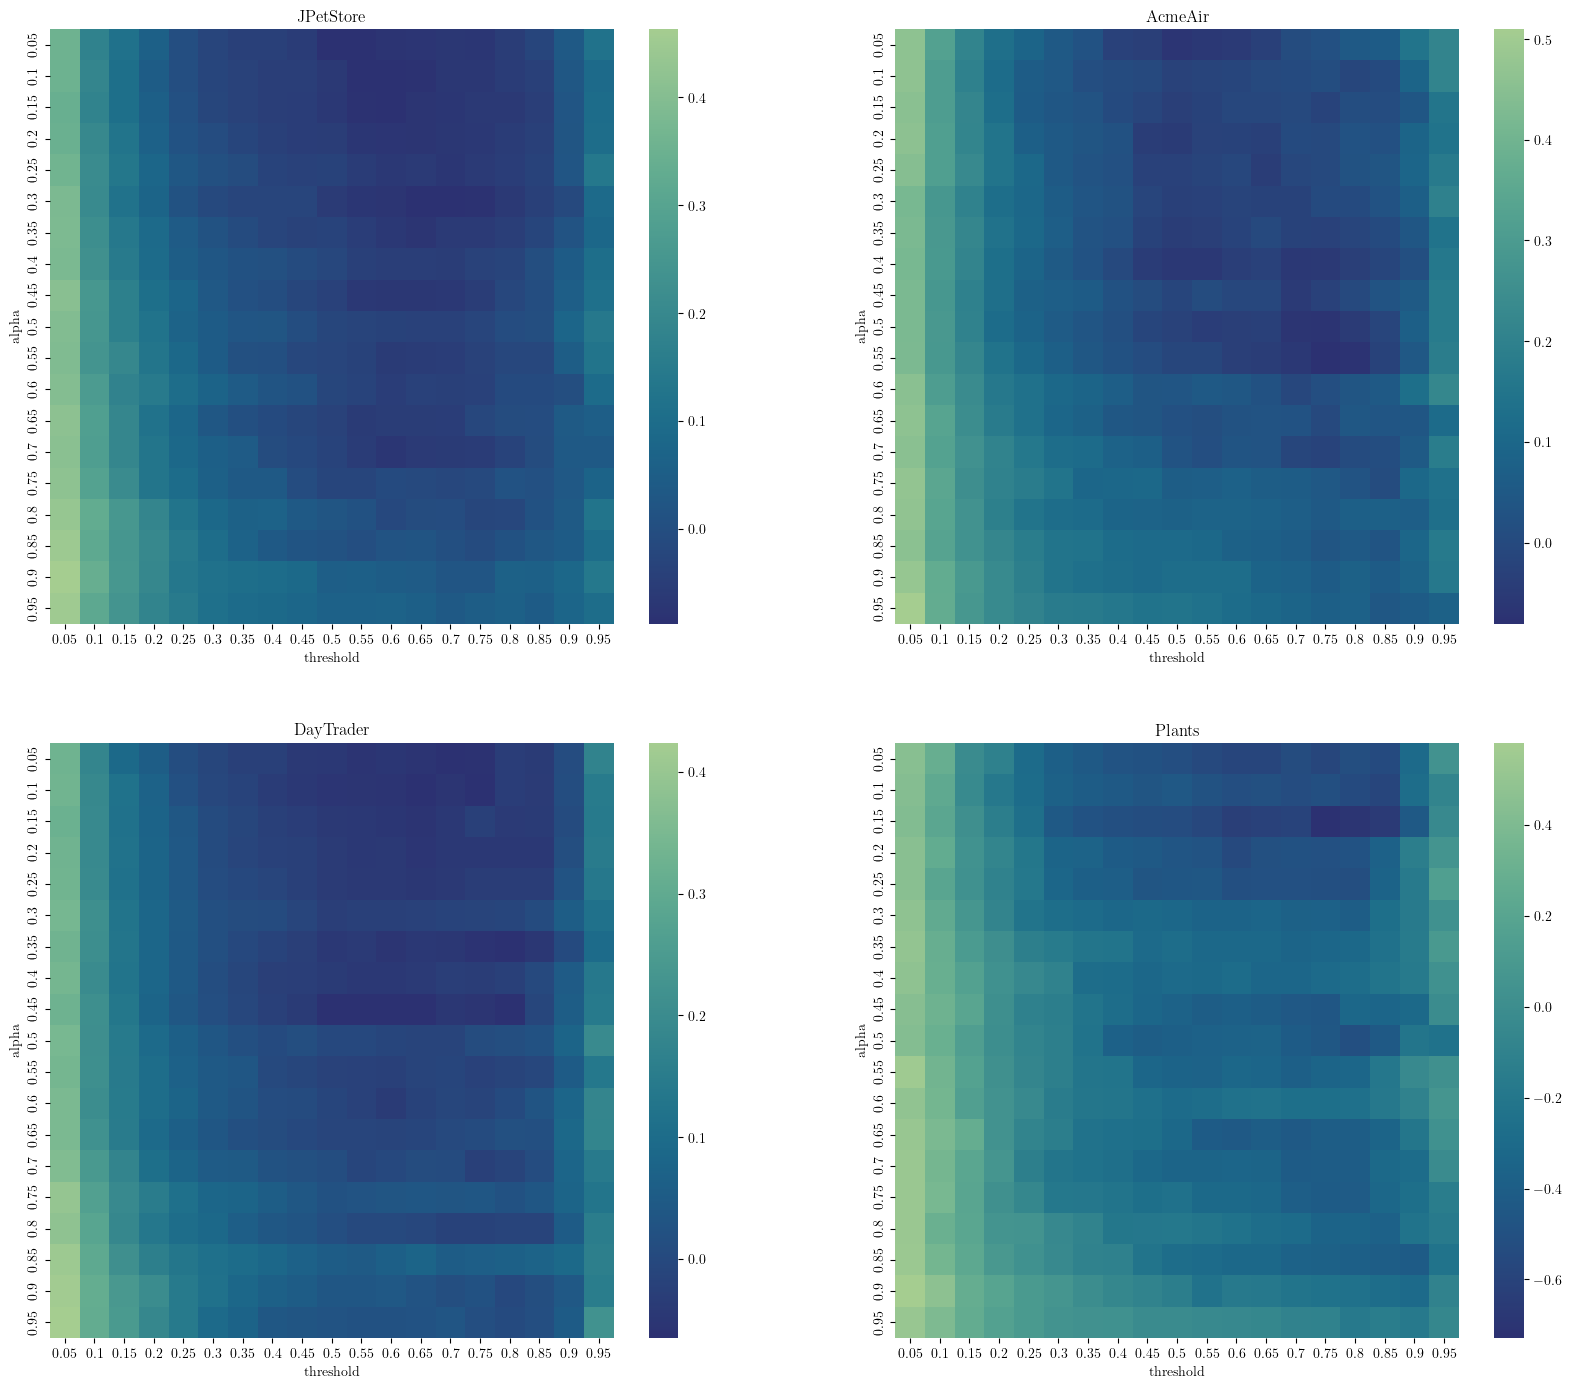

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(20, 17))
sns.heatmap(df_dict["JPetStore"].pivot(index="alpha", columns="threshold", values="overall"), cmap="crest_r", ax=axes[0, 0])
axes[0, 0].set_title("JPetStore")
sns.heatmap(df_dict["AcmeAir"].pivot(index="alpha", columns="threshold", values="overall"), cmap="crest_r", ax=axes[0, 1])
axes[0, 1].set_title("AcmeAir")
sns.heatmap(df_dict["DayTrader"].pivot(index="alpha", columns="threshold", values="overall"), cmap="crest_r", ax=axes[1, 0])
axes[1, 0].set_title("DayTrader")
sns.heatmap(df_dict["Plants"].pivot(index="alpha", columns="threshold", values="overall"), cmap="crest_r", ax=axes[1, 1])
axes[1, 1].set_title("Plants")
plt.show()
fig.savefig("ProjectsHeatmaps.pdf", bbox_inches="tight")

In [92]:
f = lambda x: df_dict[x][df_dict[x]['overall'] > 0.3]

In [83]:
f("JPetStore")
# (0.8, 0.05) - (0.95, 0.10)

,alpha,threshold,SM,IFN,NED,ICP,overall
22,0.05,0.05,0.045903,0.758386,0.452058,0.414162,0.355324
43,0.10,0.05,0.039420,0.766707,0.432713,0.431703,0.352074
64,0.15,0.05,0.044221,0.791966,0.451034,0.433094,0.342032
85,0.20,0.05,0.051672,0.784429,0.478107,0.405286,0.345962
106,0.25,0.05,0.059417,0.738343,0.471722,0.406744,0.360652
127,0.30,0.05,0.053501,0.688915,0.444230,0.387465,0.383223
148,0.35,0.05,0.059310,0.713988,0.418300,0.388960,0.384516
169,0.40,0.05,0.054155,0.691745,0.429827,0.410919,0.380416
190,0.45,0.05,0.077425,0.669980,0.392989,0.379005,0.408863
211,0.50,0.05,0.076413,0.704832,0.404570,0.388554,0.394614


In [ ]:
f("AcmeAir")
# (0.6, 0.05) - (0.95, 0.10)

,alpha,threshold,SM,IFN,NED,ICP,overall
22,0.05,0.05,0.116572,0.620812,0.438023,0.216797,0.460235
23,0.05,0.10,0.117441,0.941249,0.571062,0.322235,0.320724
43,0.10,0.05,0.123436,0.594796,0.459870,0.221866,0.461726
44,0.10,0.10,0.112708,1.015293,0.551165,0.328128,0.304531
64,0.15,0.05,0.135814,0.680307,0.416200,0.226590,0.453179
65,0.15,0.10,0.124297,1.037685,0.539017,0.326968,0.305157
85,0.20,0.05,0.125329,0.645929,0.413043,0.231298,0.458765
86,0.20,0.10,0.130954,0.988725,0.556511,0.327114,0.314651
106,0.25,0.05,0.141557,0.683105,0.444198,0.234126,0.445032
107,0.25,0.10,0.154735,1.000314,0.564050,0.334796,0.313894


In [86]:
f("DayTrader")
# (0.9, 0.05) - (0.95, 0.10)

,alpha,threshold,SM,IFN,NED,ICP,overall
22,0.05,0.05,0.075732,0.845932,0.481357,0.429676,0.329692
43,0.10,0.05,0.092870,0.853752,0.473750,0.432531,0.333209
64,0.15,0.05,0.078621,0.891121,0.459405,0.443124,0.321242
85,0.20,0.05,0.079195,0.855073,0.452437,0.444082,0.331901
106,0.25,0.05,0.076972,0.852038,0.458077,0.433543,0.333329
127,0.30,0.05,0.084339,0.830807,0.447360,0.435006,0.342792
148,0.35,0.05,0.068364,0.860749,0.447377,0.439749,0.330122
169,0.40,0.05,0.067341,0.832056,0.437766,0.431882,0.341409
190,0.45,0.05,0.058653,0.856250,0.452761,0.441621,0.327005
211,0.50,0.05,0.092163,0.817940,0.442066,0.446562,0.346399


In [ ]:
f("Plants")
# (0.85, 0.05) - (0.95, 0.10)

,alpha,threshold,SM,IFN,NED,ICP,overall
22,0.05,0.05,0.300442,0.925904,0.429762,0.162209,0.445642
43,0.10,0.05,0.266635,0.944180,0.439793,0.164007,0.429664
64,0.15,0.05,0.229009,0.947266,0.427998,0.172004,0.420435
85,0.20,0.05,0.262566,0.875816,0.423501,0.164259,0.449747
106,0.25,0.05,0.323527,0.939198,0.434612,0.162839,0.446720
127,0.30,0.05,0.460897,1.015586,0.393188,0.160274,0.472962
148,0.35,0.05,0.496467,0.990675,0.372575,0.159529,0.493422
169,0.40,0.05,0.402029,0.895040,0.431217,0.173881,0.475473
190,0.45,0.05,0.274827,0.933951,0.425044,0.160875,0.438740
191,0.45,0.10,0.308571,1.323413,0.465697,0.242330,0.319283
